<a href="https://colab.research.google.com/github/u1-byte/SmartCropYieldsPrediction/blob/main/Machine%20Learning/Code/%5BLama_Penyinaran%5DML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Cuaca.csv to Cuaca.csv


# **Provinsi Jatim**

In [ ]:
# Input data Jatim
input_lama_penyinaran_ratarata = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_lama_penyinaran_ratarata.append(float(row[4]))
    number+=1

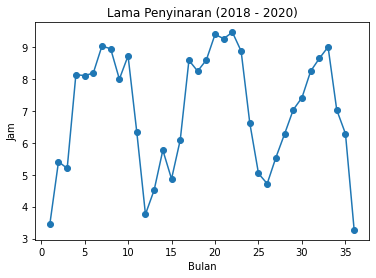

In [ ]:
# Grafik garis dari Suhu
plt.plot(number_of_input,input_lama_penyinaran_ratarata,marker='o')
plt.title('Lama Penyinaran (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

In [ ]:
# Input dari data pada database
dataset = []
counter=0

# Baca file.csv
with open('/content/Cuaca.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    dataset.append([])
    dataset[counter].append(float(row[4]))
    counter+=1

dataset = np.array(dataset)

print(dataset)

[[3.44]
 [5.41]
 [5.2 ]
 [8.14]
 [8.11]
 [8.19]
 [9.04]
 [8.95]
 [8.  ]
 [8.73]
 [6.35]
 [3.76]
 [4.52]
 [5.77]
 [4.87]
 [6.09]
 [8.59]
 [8.25]
 [8.6 ]
 [9.4 ]
 [9.27]
 [9.47]
 [8.88]
 [6.62]
 [5.04]
 [4.72]
 [5.54]
 [6.28]
 [7.04]
 [7.42]
 [8.25]
 [8.65]
 [9.01]
 [7.03]
 [6.29]
 [3.27]]


In [ ]:
# Normalisasi dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [ ]:
# Fungsi membuat sequence
def buat_sequences(dataset, window_size):
    input = []
    output = []

    for i in range(len(dataset)-window_size+1):
        window = dataset[i:(i+window_size-4), 0]
        input.append(window)
        output.append(dataset[(i+window_size-4):i+window_size, 0])
    return np.array(input),np.array(output)

window_size = 16
dataInput, dataOutput = buat_sequences(dataset, window_size)

print(len(dataInput))
print(len(dataOutput))

21
21


In [ ]:
# Bagi data untuk training dan testing
input_train, input_test, output_train, output_test = train_test_split(dataInput, dataOutput, test_size=0.15, shuffle=True)

print(len(input_train))
print(len(input_test))

17
4


In [ ]:
# Ubah dimensinya untuk disesuaikan dengan model
input_train = input_train.reshape((input_train.shape[0], 1, 1, 1, window_size-4))
input_test = input_test.reshape((input_test.shape[0], 1, 1, 1, window_size-4))

print(input_test)

[[[[[0.96774194 1.         0.90483871 0.54032258 0.28548387 0.23387097
     0.36612903 0.48548387 0.60806452 0.66935484 0.80322581 0.86774194]]]]



 [[[[0.02741935 0.34516129 0.31129032 0.78548387 0.78064516 0.79354839
     0.93064516 0.91612903 0.76290323 0.88064516 0.49677419 0.07903226]]]]



 [[[[0.40322581 0.25806452 0.45483871 0.85806452 0.80322581 0.85967742
     0.98870968 0.96774194 1.         0.90483871 0.54032258 0.28548387]]]]



 [[[[0.49677419 0.07903226 0.2016129  0.40322581 0.25806452 0.45483871
     0.85806452 0.80322581 0.85967742 0.98870968 0.96774194 1.        ]]]]]


In [ ]:
#model machine learning
model = tf.keras.models.Sequential([
  tf.keras.layers.ConvLSTM2D(filters=512, kernel_size=(1,1), activation='relu', input_shape=(1, 1, 1, window_size-4)),   
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dropout(0.1),
  tf.keras.layers.Dense(128, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
])

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss='mean_squared_error',metrics=["mae"])

model.summary()

#fit the model
fitting_history = model.fit(input_train, output_train, validation_split=0.15, verbose=2, epochs=300)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 1, 1, 512)         1075200   
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               131328    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 16)                2064      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 6

<Figure size 432x288 with 0 Axes>

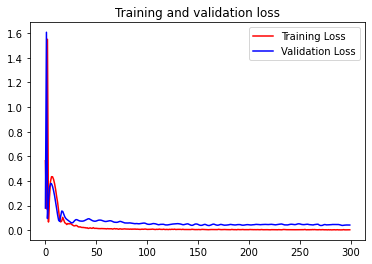

<Figure size 432x288 with 0 Axes>

In [ ]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

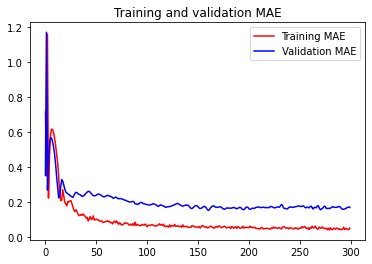

<Figure size 432x288 with 0 Axes>

In [ ]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [ ]:
# Menghitung nilai MSE dan MAE
mse_score, mae_score = model.evaluate(input_test, output_test)
print('Nilai Mean Squared Error (MSE) : ', mse_score)
print('Nilai Mean Absolute Error (MAE) : ', mae_score)

1/1 [==============================] - 0s 19ms/step - loss: 0.0905 - mae: 0.2034
Nilai Mean Squared Error (MSE) :  0.09045171737670898
Nilai Mean Absolute Error (MAE) :  0.20343461632728577


In [ ]:
# Simpan model
model.save('model-lamapenyinaran.h5')

# **Testing Model**

In [ ]:
# Load the model
model = tf.keras.models.load_model('model-lamapenyinaran.h5')

In [ ]:
#Prediksi Data
data_prediksi = model.predict(input_test)

In [ ]:
print(data_prediksi)
print("-------")
print(output_test)

[[0.91219294 0.9745471  0.99530345 0.8792453 ]
 [0.29166532 0.26488674 0.37705153 0.5697508 ]
 [0.3127225  0.28858128 0.41229856 0.62148315]
 [0.54975915 0.29931533 0.2509601  0.38375953]]
-------
[[0.92580645 0.60645161 0.48709677 0.        ]
 [0.2016129  0.40322581 0.25806452 0.45483871]
 [0.23387097 0.36612903 0.48548387 0.60806452]
 [0.90483871 0.54032258 0.28548387 0.23387097]]


In [ ]:
# Inverse transform data min max
data_prediksi = scaler.inverse_transform(data_prediksi)
output_test = scaler.inverse_transform(output_test)

In [ ]:
print(data_prediksi)
print("-------")
print(output_test)

[[8.925596  9.312192  9.440882  8.72132  ]
 [5.078325  4.9122977 5.6077194 6.802455 ]
 [5.2088795 5.059204  5.826251  7.1231956]
 [6.6785064 5.125755  4.8259525 5.649309 ]]
-------
[[9.01 7.03 6.29 3.27]
 [4.52 5.77 4.87 6.09]
 [4.72 5.54 6.28 7.04]
 [8.88 6.62 5.04 4.72]]


[9.01, 7.029999999999999, 6.290000000000001, 3.27]
[1, 2, 3, 4]
[8.925596, 9.312192, 9.440882, 8.72132]
[1, 2, 3, 4]


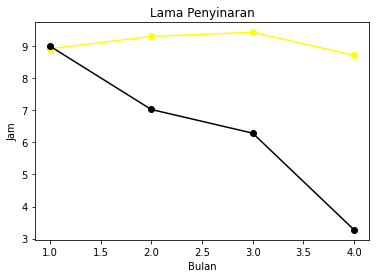

In [ ]:
temp_test=[]
number=[]
count=1

for j in output_test[0]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[0]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Lama Penyinaran')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

[4.52, 5.77, 4.87, 6.09]
[1, 2, 3, 4]
[5.078325, 4.9122977, 5.6077194, 6.802455]
[1, 2, 3, 4]


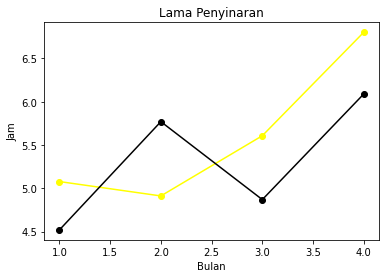

In [ ]:
temp_test=[]
number=[]
count=1

for j in output_test[1]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[1]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Lama Penyinaran')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

[4.72, 5.54, 6.28, 7.04]
[1, 2, 3, 4]
[5.2088795, 5.059204, 5.826251, 7.1231956]
[1, 2, 3, 4]


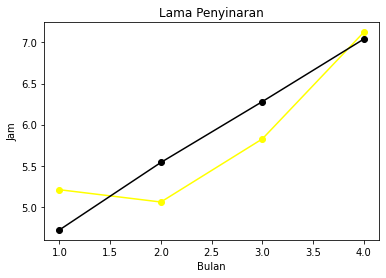

In [ ]:
temp_test=[]
number=[]
count=1

for j in output_test[2]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[2]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Lama Penyinaran')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

[8.88, 6.620000000000001, 5.04, 4.72]
[1, 2, 3, 4]
[6.6785064, 5.125755, 4.8259525, 5.649309]
[1, 2, 3, 4]


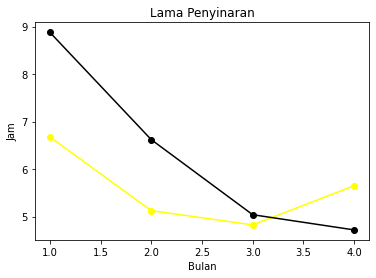

In [ ]:
temp_test=[]
number=[]
count=1

for j in output_test[3]:
  temp_test.append(j)
  number.append(count)
  count+=1
  
print(temp_test)
print(number)

temp_predict=[]
number=[]
count=1

for j in data_prediksi[3]:
  temp_predict.append(j)
  number.append(count)
  count+=1
  
print(temp_predict)
print(number)

# Grafik garis dari Suhu
plt.plot(number,temp_predict,marker='o',color="yellow")
plt.plot(number,temp_test,marker='o',color="black")
plt.title('Lama Penyinaran')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()